Gruppenarbeit von Yanick Bedel und Niklas Seither

Dataset: https://www.kaggle.com/code/supratimhaldar/deepartist-identify-artist-from-art/input  
This notebook was run on Google Collab

In [22]:
 !gdown --id 1J1tNFyqevx6dwp4Hyz2iCBwEbvLzWvwU
 !rm -r ./artists
 !unzip artists.zip -d artists

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
 extracting: artists/artists/resized/Henri_Matisse_78.jpg  
  inflating: artists/artists/resized/Henri_Matisse_79.jpg  
  inflating: artists/artists/resized/Henri_Matisse_8.jpg  
  inflating: artists/artists/resized/Henri_Matisse_80.jpg  
  inflating: artists/artists/resized/Henri_Matisse_81.jpg  
  inflating: artists/artists/resized/Henri_Matisse_82.jpg  
  inflating: artists/artists/resized/Henri_Matisse_83.jpg  
  inflating: artists/artists/resized/Henri_Matisse_84.jpg  
  inflating: artists/artists/resized/Henri_Matisse_85.jpg  
  inflating: artists/artists/resized/Henri_Matisse_86.jpg  
  inflating: artists/artists/resized/Henri_Matisse_87.jpg  
  inflating: artists/artists/resized/Henri_Matisse_88.jpg  
 extracting: artists/artists/resized/Henri_Matisse_89.jpg  
  inflating: artists/artists/resized/Henri_Matisse_9.jpg  
  inflating: artists/artists/resized/Henri_Matisse_90.jpg  
  inflating: artists/artists/resize

In [23]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
import shutil
from tqdm import tqdm, tqdm_notebook
import random

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.initializers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [24]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [25]:
# Fix problems with filenames
images_dir = "/content/artists/artists/resized"
albrecht_dürer1 = "Albrecht_Du╠Иrer"
alfred_dürer2 = "Albrecht_DuΓòá├¬rer"
albrecht_dürer3 = "Albrecht_DuтХа├кrer"

images = os.listdir(images_dir)
images.sort(reverse=True)

for filename in images:
  if albrecht_dürer1.lower() in filename.lower():
      new_filename = filename.replace(albrecht_dürer1, "Albrecht_Dürer")
      old_file = os.path.join(images_dir, filename)
      new_file = os.path.join(images_dir, new_filename)
      os.rename(old_file, new_file)
      print(f'Renamed: {filename} → {new_filename}')

  if alfred_dürer2 in filename:
      old_file = os.path.join(images_dir, filename)
      os.remove(old_file)
      print(f'Deleted: {filename}')
  if albrecht_dürer3 in filename:
      old_file = os.path.join(images_dir, filename)
      os.remove(old_file)
      print(f'Deleted: {filename}')

Renamed: Albrecht_Du╠Иrer_99.jpg → Albrecht_Dürer_99.jpg
Renamed: Albrecht_Du╠Иrer_98.jpg → Albrecht_Dürer_98.jpg
Renamed: Albrecht_Du╠Иrer_97.jpg → Albrecht_Dürer_97.jpg
Renamed: Albrecht_Du╠Иrer_96.jpg → Albrecht_Dürer_96.jpg
Renamed: Albrecht_Du╠Иrer_95.jpg → Albrecht_Dürer_95.jpg
Renamed: Albrecht_Du╠Иrer_94.jpg → Albrecht_Dürer_94.jpg
Renamed: Albrecht_Du╠Иrer_93.jpg → Albrecht_Dürer_93.jpg
Renamed: Albrecht_Du╠Иrer_92.jpg → Albrecht_Dürer_92.jpg
Renamed: Albrecht_Du╠Иrer_91.jpg → Albrecht_Dürer_91.jpg
Renamed: Albrecht_Du╠Иrer_90.jpg → Albrecht_Dürer_90.jpg
Renamed: Albrecht_Du╠Иrer_9.jpg → Albrecht_Dürer_9.jpg
Renamed: Albrecht_Du╠Иrer_89.jpg → Albrecht_Dürer_89.jpg
Renamed: Albrecht_Du╠Иrer_88.jpg → Albrecht_Dürer_88.jpg
Renamed: Albrecht_Du╠Иrer_87.jpg → Albrecht_Dürer_87.jpg
Renamed: Albrecht_Du╠Иrer_86.jpg → Albrecht_Dürer_86.jpg
Renamed: Albrecht_Du╠Иrer_85.jpg → Albrecht_Dürer_85.jpg
Renamed: Albrecht_Du╠Иrer_84.jpg → Albrecht_Dürer_84.jpg
Renamed: Albrecht_Du╠Иrer_83.jpg 

In [26]:
for filename in os.listdir(images_dir):
    # Ensure we're only working with image files
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Extract the artist's name (everything before the last underscore)
        artist_name = filename.rsplit('_', 1)[0]
        artist_folder = os.path.join(images_dir, artist_name)

        # Create a new folder for the artist if it doesn't exist
        if not os.path.exists(artist_folder):
            os.makedirs(artist_folder)

        # Move the file into the corresponding artist folder
        source_path = os.path.join(images_dir, filename)
        destination_path = os.path.join(artist_folder, filename)
        shutil.move(source_path, destination_path)

        print(f"Moved: {filename} → {artist_folder}")

Die letzten 5000 Zeilen der Streamingausgabe wurden abgeschnitten.
Moved: Titian_168.jpg → /content/artists/artists/resized/Titian
Moved: Pieter_Bruegel_82.jpg → /content/artists/artists/resized/Pieter_Bruegel
Moved: Henri_Matisse_29.jpg → /content/artists/artists/resized/Henri_Matisse
Moved: Titian_15.jpg → /content/artists/artists/resized/Titian
Moved: Andy_Warhol_131.jpg → /content/artists/artists/resized/Andy_Warhol
Moved: Titian_81.jpg → /content/artists/artists/resized/Titian
Moved: Edgar_Degas_653.jpg → /content/artists/artists/resized/Edgar_Degas
Moved: Andy_Warhol_25.jpg → /content/artists/artists/resized/Andy_Warhol
Moved: Mikhail_Vrubel_11.jpg → /content/artists/artists/resized/Mikhail_Vrubel
Moved: Vincent_van_Gogh_557.jpg → /content/artists/artists/resized/Vincent_van_Gogh
Moved: Albrecht_Dürer_94.jpg → /content/artists/artists/resized/Albrecht_Dürer
Moved: Albrecht_Dürer_91.jpg → /content/artists/artists/resized/Albrecht_Dürer
Moved: Amedeo_Modigliani_61.jpg → /content/ar

In [27]:
df_artists = pd.read_csv("artists/artists/artists.csv")
df_artists.head()

,id,name,years,genre,nationality,bio,wikipedia,paintings
0,0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian,Amedeo Clemente Modigliani (Italian pronunciat...,http://en.wikipedia.org/wiki/Amedeo_Modigliani,193
1,1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian,Wassily Wassilyevich Kandinsky (Russian: Васи́...,http://en.wikipedia.org/wiki/Wassily_Kandinsky,88
2,2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican,Diego María de la Concepción Juan Nepomuceno E...,http://en.wikipedia.org/wiki/Diego_Rivera,70
3,3,Claude Monet,1840 - 1926,Impressionism,French,Oscar-Claude Monet (; French: [klod mɔnɛ]; 14 ...,http://en.wikipedia.org/wiki/Claude_Monet,73
4,4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian,René François Ghislain Magritte (French: [ʁəne...,http://en.wikipedia.org/wiki/René_Magritte,194


In [28]:
df_artists = df_artists.sort_values(by=['paintings'], ascending=False)
df_artists.head()

,id,name,years,genre,nationality,bio,wikipedia,paintings
8,8,Vincent van Gogh,1853 – 1890,Post-Impressionism,Dutch,Vincent Willem van Gogh (Dutch: [ˈvɪnsɛnt ˈʋɪl...,http://en.wikipedia.org/wiki/Vincent_van_Gogh,877
30,30,Edgar Degas,1834 - 1917,Impressionism,French,Edgar Degas (US: or UK: ; born Hilaire-Germai...,http://en.wikipedia.org/wiki/Edgar_Degas,702
13,13,Pablo Picasso,1881 - 1973,Cubism,Spanish,Pablo Ruiz Picasso (; Spanish: [ˈpaβlo piˈkaso...,http://en.wikipedia.org/wiki/Pablo_Picasso,439
15,15,Pierre-Auguste Renoir,1841 - 1919,Impressionism,French,"Pierre-Auguste Renoir, commonly known as Augus...",http://en.wikipedia.org/wiki/Pierre-Auguste_Re...,336
19,19,Albrecht Dürer,1471 - 1528,Northern Renaissance,German,Albrecht Dürer (; German: [ˈʔalbʁɛçt ˈdyːʁɐ]; ...,http://en.wikipedia.org/wiki/Albrecht_Dürer,328


<Axes: >

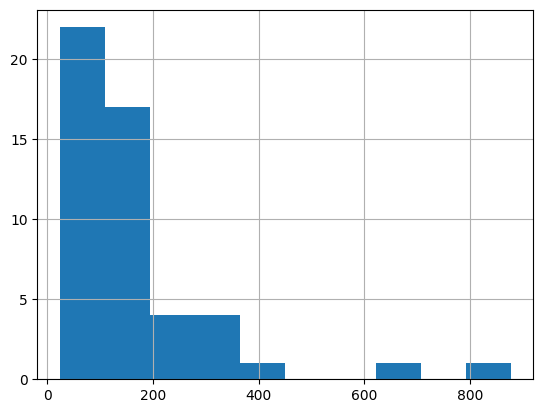

In [29]:
df_artists["paintings"].hist()

,paintings
count,11.000000
mean,390.818182
std,208.393771
min,239.000000
25%,260.500000
50%,311.000000
75%,387.500000
max,877.000000


<Axes: >

,name,paintings
0,Vincent van Gogh,877
1,Edgar Degas,702
2,Pablo Picasso,439
3,Pierre-Auguste Renoir,336
4,Albrecht Dürer,328


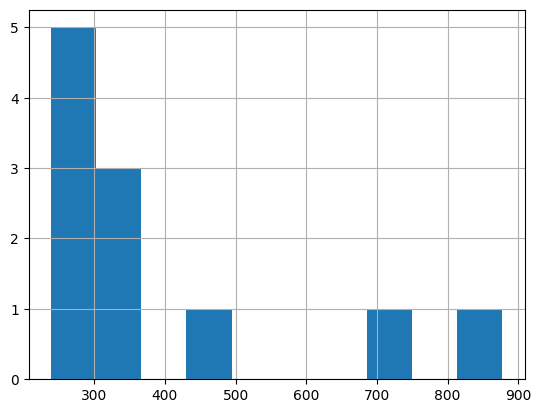

In [30]:
# Je nach Architektur des neuronalen Netzes werden große Trainigsmengen benötigt, daher werden Künstler mit weniger als 150 Paintings nicht berücksichtigt
df_artists_filtered = df_artists[df_artists['paintings'] >= 200].reset_index()
df_artists_filtered = df_artists_filtered[['name', 'paintings']]
display(df_artists_filtered.describe(), df_artists_filtered["paintings"].hist(), df_artists_filtered.head())

In [31]:
artists_dirs = os.listdir(images_dir)
artists_names = df_artists_filtered['name'].str.replace(' ', '_').values

In [32]:
# Berechnung von Class Weights zur Korrektur von Ungleichgewichten in der Bildanzahl pro Künstler und zur Vermeidung von Verzerrungen im Modell
df_artists_filtered['class_weight'] = max(df_artists_filtered.paintings)/df_artists_filtered.paintings
df_artists_filtered['class_weight'] = df_artists_filtered.paintings.sum() / (df_artists_filtered.shape[0] * df_artists_filtered.paintings)
df_artists_filtered

,name,paintings,class_weight
0,Vincent van Gogh,877,0.445631
1,Edgar Degas,702,0.556721
2,Pablo Picasso,439,0.890246
3,Pierre-Auguste Renoir,336,1.163149
4,Albrecht Dürer,328,1.191519
5,Paul Gauguin,311,1.256650
6,Francisco Goya,291,1.343018
7,Rembrandt,262,1.491672
8,Alfred Sisley,259,1.508951
9,Titian,255,1.532620


In [33]:
batch_size = 32
num_classes = len(df_artists_filtered)
train_input_shape = (224, 224, 3) # Height, Width, Color Channels (RGB)

data_gen = ImageDataGenerator(
    validation_split=0.2,
    rescale=1./255.,
    shear_range=5,
    horizontal_flip=True,
    vertical_flip=True,
)

train_gen = data_gen.flow_from_directory(
    directory=images_dir,
    class_mode='categorical',
    target_size=train_input_shape[0:2],
    batch_size=batch_size,
    subset="training",
    shuffle=True,
    classes=artists_names.tolist()
)

validation_gen = data_gen.flow_from_directory(
    directory=images_dir,
    class_mode='categorical',
    target_size=train_input_shape[0:2],
    batch_size=batch_size,
    subset="validation",
    shuffle=False,
    classes=artists_names.tolist()
)

Found 3444 images belonging to 11 classes.
Found 855 images belonging to 11 classes.


In [34]:
# Load pre-trained model
res_net50_model = ResNet50(weights='imagenet', include_top=False, input_shape=train_input_shape)

In [35]:
# Add layers at the end
x = res_net50_model.output
x = Flatten()(x)

x = Dense(512, kernel_initializer='he_uniform')(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

x = Dense(16, kernel_initializer='he_uniform')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)

output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=res_net50_model.input, outputs=output)

In [36]:
optimizer = Adam(learning_rate=0.0001)
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizer,
    metrics=['accuracy']
)

In [37]:
for layer in model.layers:
    layer.trainable = True

optimizer = Adam(learning_rate=0.0001)

model.compile(loss='categorical_crossentropy',
  optimizer=optimizer,
  metrics=['accuracy']
)

epochs = 15
class_weights = df_artists_filtered['class_weight'].to_dict()

history = model.fit(train_gen,
  validation_data=validation_gen,
  epochs=epochs,
  shuffle=True,
  verbose=1,
  class_weight=class_weights
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


108/108 ━━━━━━━━━━━━━━━━━━━━ 142s 779ms/step - accuracy: 0.2648 - loss: 2.1251 - val_accuracy: 0.0596 - val_loss: 2.7873
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 53s 464ms/step - accuracy: 0.5068 - loss: 1.6091 - val_accuracy: 0.0351 - val_loss: 2.4396
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 54s 472ms/step - accuracy: 0.5748 - loss: 1.4659 - val_accuracy: 0.0912 - val_loss: 2.4098
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 53s 469ms/step - accuracy: 0.6240 - loss: 1.4234 - val_accuracy: 0.1158 - val_loss: 2.4053
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 53s 463ms/step - accuracy: 0.6811 - loss: 1.2923 - val_accuracy: 0.1684 - val_loss: 2.3723
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 53s 463ms/step - accuracy: 0.6884 - loss: 1.2702 - val_accuracy: 0.1579 - val_loss: 2.3173
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 53s 466ms/step - accuracy: 0.7055 - loss: 1.2239 - val_accuracy: 0.3240 - val_loss: 2.0997
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 53s 463ms/step - accuracy: 0.7189 - loss: 1.1712 - va

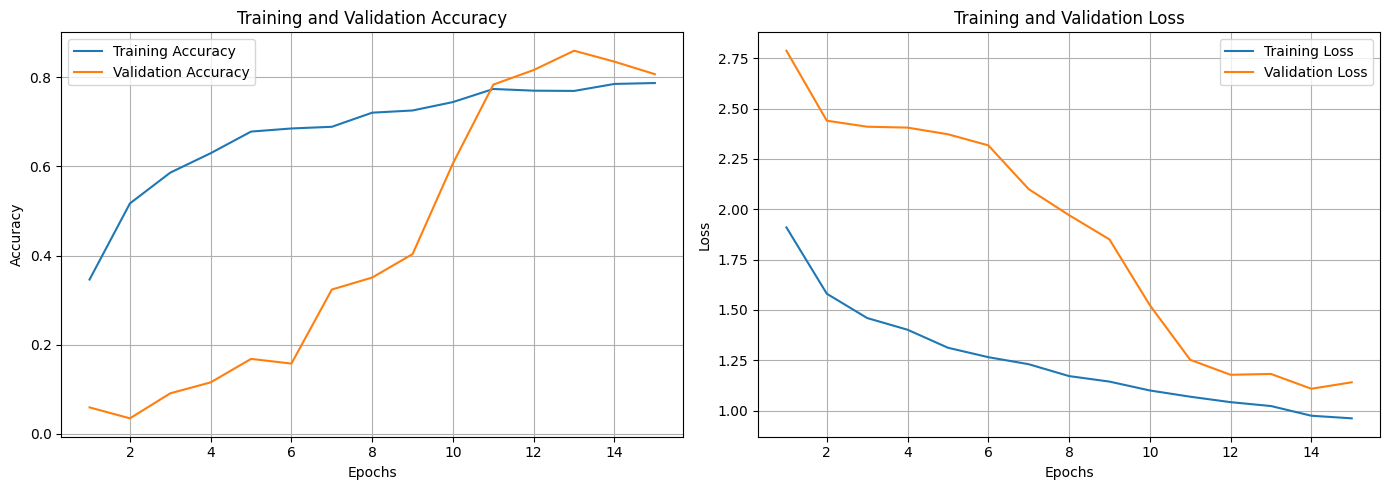

In [38]:
epochs = range(1, len(history.history['accuracy']) + 1)

# Create subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot Training and Validation Accuracy
axs[0].plot(epochs, history.history['accuracy'], label='Training Accuracy')
axs[0].plot(epochs, history.history['val_accuracy'], label='Validation Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Plot Training and Validation Loss
axs[1].plot(epochs, history.history['loss'], label='Training Loss')
axs[1].plot(epochs, history.history['val_loss'], label='Validation Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [39]:
# Prediction accuracy on train data
score = model.evaluate(train_gen, verbose=1)
print("Prediction accuracy on train data =", score[1])

108/108 ━━━━━━━━━━━━━━━━━━━━ 44s 410ms/step - accuracy: 0.9694 - loss: 0.7383
Prediction accuracy on train data = 0.9686411023139954


In [40]:
# Prediction accuracy on validation data
score = model.evaluate(validation_gen, verbose=1)
print("Prediction accuracy on validation data =", score[1])

27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 384ms/step - accuracy: 0.7907 - loss: 1.2583
Prediction accuracy on validation data = 0.8105263113975525


27/27 ━━━━━━━━━━━━━━━━━━━━ 17s 500ms/step


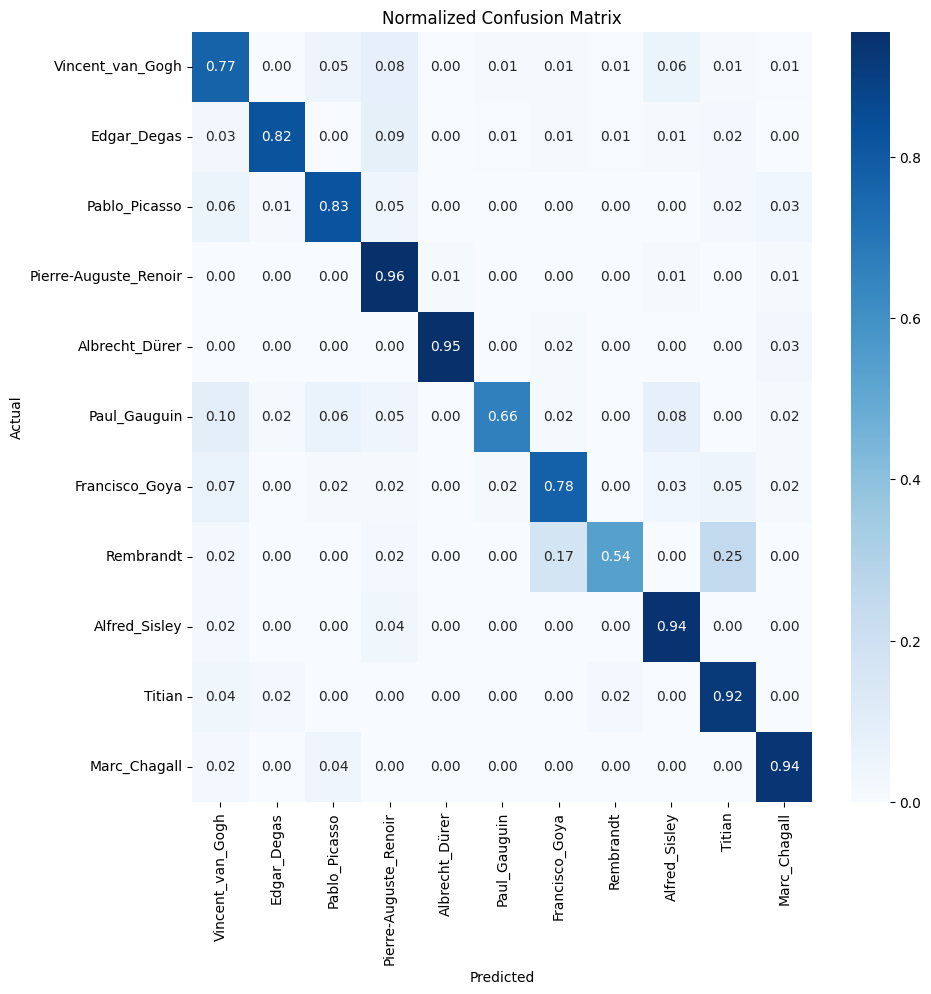

Classification Report:
                       precision    recall  f1-score   support

     Vincent_van_Gogh       0.85      0.77      0.80       175
          Edgar_Degas       0.97      0.82      0.89       140
        Pablo_Picasso       0.82      0.83      0.82        87
Pierre-Auguste_Renoir       0.63      0.96      0.76        67
       Albrecht_Dürer       0.98      0.95      0.97        65
         Paul_Gauguin       0.91      0.66      0.77        62
       Francisco_Goya       0.75      0.78      0.76        58
            Rembrandt       0.90      0.54      0.67        52
        Alfred_Sisley       0.71      0.94      0.81        51
               Titian       0.67      0.92      0.78        51
         Marc_Chagall       0.83      0.94      0.88        47

             accuracy                           0.82       855
            macro avg       0.82      0.83      0.81       855
         weighted avg       0.84      0.82      0.82       855



In [41]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def showClassficationReport_Generator(model, valid_generator):
    # Predict directly using the generator
    y_pred = model.predict(valid_generator, verbose=1)

    # Ensure predictions and true labels are aligned
    y_true = valid_generator.classes  # True labels

    # Convert predictions to class labels
    y_pred = np.argmax(y_pred, axis=1)

    # Confusion Matrix
    fig, ax = plt.subplots(figsize=(10, 10))
    conf_matrix = confusion_matrix(y_true, y_pred, labels=np.arange(len(valid_generator.class_indices)))

    # Normalize confusion matrix safely (avoiding division by zero)
    conf_matrix_normalized = np.divide(
        conf_matrix,
        conf_matrix.sum(axis=1, keepdims=True),
        where=conf_matrix.sum(axis=1, keepdims=True) != 0
    )

    # Heatmap
    sns.heatmap(conf_matrix_normalized, annot=True, fmt=".2f",
                cmap='Blues',
                xticklabels=valid_generator.class_indices.keys(),
                yticklabels=valid_generator.class_indices.keys(),
                ax=ax)

    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    ax.set_title('Normalized Confusion Matrix')
    plt.show()

    # Classification Report
    print('Classification Report:')
    print(classification_report(y_true, y_pred, target_names=list(valid_generator.class_indices.keys())))

# Call the function
showClassficationReport_Generator(model, validation_gen)

Actual artist: Pierre-Auguste Renoir
Predicted artist: Pierre-Auguste Renoir
Prediction probability: 79.38%


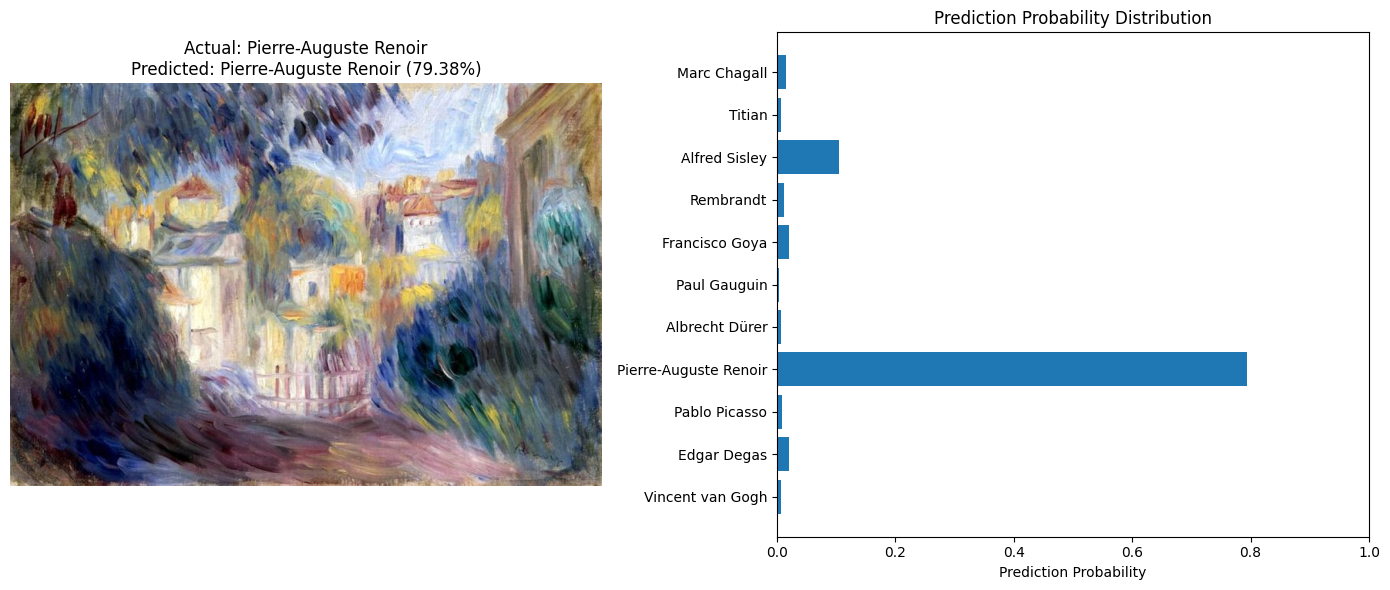

In [42]:
from keras.preprocessing import image

def predict_and_plot_probabilities(model, images_dir, artists_top_name, train_generator, train_input_shape):
    # Prepare label mapping
    labels = {v: k.replace("_", " ") for k, v in train_generator.class_indices.items()}

    # Randomly select an artist and an image
    artist = random.choice(artists_top_name)
    img_path = os.path.join(images_dir, artist, random.choice(os.listdir(os.path.join(images_dir, artist))))

    # Load and preprocess the image
    img = image.load_img(img_path, target_size=train_input_shape[:2])
    img_array = np.expand_dims(image.img_to_array(img) / 255.0, axis=0)

    # Predict
    prediction = model.predict(img_array, verbose=0).flatten()
    pred_idx = np.argmax(prediction)
    pred_prob = np.max(prediction) * 100

    # Display results
    predicted_artist = labels[pred_idx]
    actual_artist = artist.replace("_", " ")

    print(f"Actual artist: {actual_artist}")
    print(f"Predicted artist: {predicted_artist}")
    print(f"Prediction probability: {pred_prob:.2f}%")

    # Plot the image and the prediction distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Show the selected image
    ax1.imshow(plt.imread(img_path))
    ax1.axis('off')
    ax1.set_title(f"Actual: {actual_artist}\nPredicted: {predicted_artist} ({pred_prob:.2f}%)")

    # Plot prediction probabilities
    class_names = [labels[i] for i in range(len(labels))]
    ax2.barh(class_names, prediction)
    ax2.set_xlabel('Prediction Probability')
    ax2.set_xlim(0, 1)
    ax2.set_title('Prediction Probability Distribution')

    plt.tight_layout()
    plt.show()

# Call the function
predict_and_plot_probabilities(model, images_dir, artists_names, train_gen, train_input_shape)
